In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
# Load data
data = pd.read_csv('E:\My Work\Project\Dignatara\data\SMA_data.csv')

In [5]:
print(data.head())

                     Datetime          SMA
0  2018-01-01 04:34:10.320672  6864.691463
1  2018-01-01 12:37:36.596064  6864.689664
2  2018-01-01 20:31:55.898112  6864.688585
3  2018-01-02 05:42:49.014720  6864.684927
4  2018-01-02 12:13:01.263360  6864.682858


In [6]:
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [7]:
# Extract features
window_size = 60  # 1 hour
features = []
for i in range(len(data) - window_size):
    window = data.iloc[i:i+window_size]
    mean_sma = window['SMA'].mean()
    std_sma = window['SMA'].std()
    slope_sma = (window['SMA'].iloc[-1] - window['SMA'].iloc[0]) / window_size
    features.append([mean_sma, std_sma, slope_sma])

In [8]:
# Create labels
labels = np.zeros(len(features))
for i in range(len(labels)):
    if data.iloc[i+window_size]['SMA'] > data.iloc[i]['SMA'] + 0.1:
        labels[i] = 1  # maneuver detected

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [10]:
# Train random forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.996


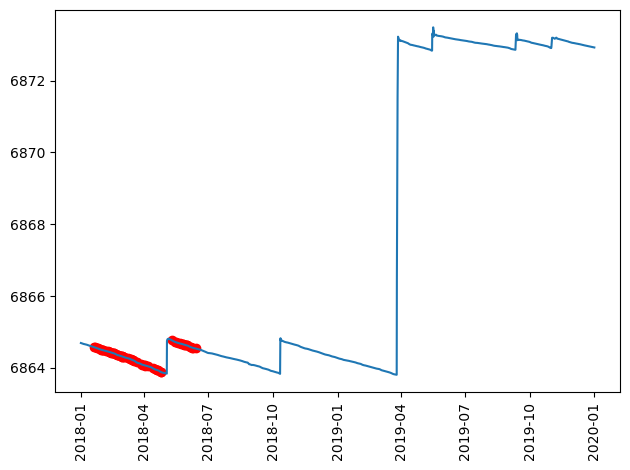

In [12]:
# Plot detected maneuvers
detected_maneuvers = np.where(y_pred == 1)[0]
plt.plot(data['Datetime'], data['SMA'])
plt.scatter(data['Datetime'].iloc[detected_maneuvers + window_size], data['SMA'].iloc[detected_maneuvers + window_size], c='r')
plt.xticks(rotation=90)  # Rotate x-axis labels 90 degrees
plt.tight_layout()
plt.show()